In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000106926"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000106926
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,WHITNEY HOLDING CORP
Ticker,WTNY


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,2.0,1.278000e+01,9.899495e-02,1.271000e+01,1.274500e+01,1.278000e+01,1.281500e+01,1.285000e+01
interest income,19.0,1.389245e+08,1.884860e+07,1.095650e+08,1.237750e+08,1.384390e+08,1.552430e+08,1.694450e+08
net income,20.0,4.645085e+06,3.236831e+07,-8.848900e+07,-1.285250e+07,7.928000e+06,3.115600e+07,4.876600e+07
net interest income,19.0,1.113040e+08,5.236103e+06,9.987200e+07,1.082415e+08,1.114350e+08,1.155885e+08,1.195400e+08
provision for loan losses,20.0,3.640370e+07,3.860217e+07,-2.000000e+06,1.750000e+06,3.625000e+07,6.050000e+07,1.485000e+08


# Plots

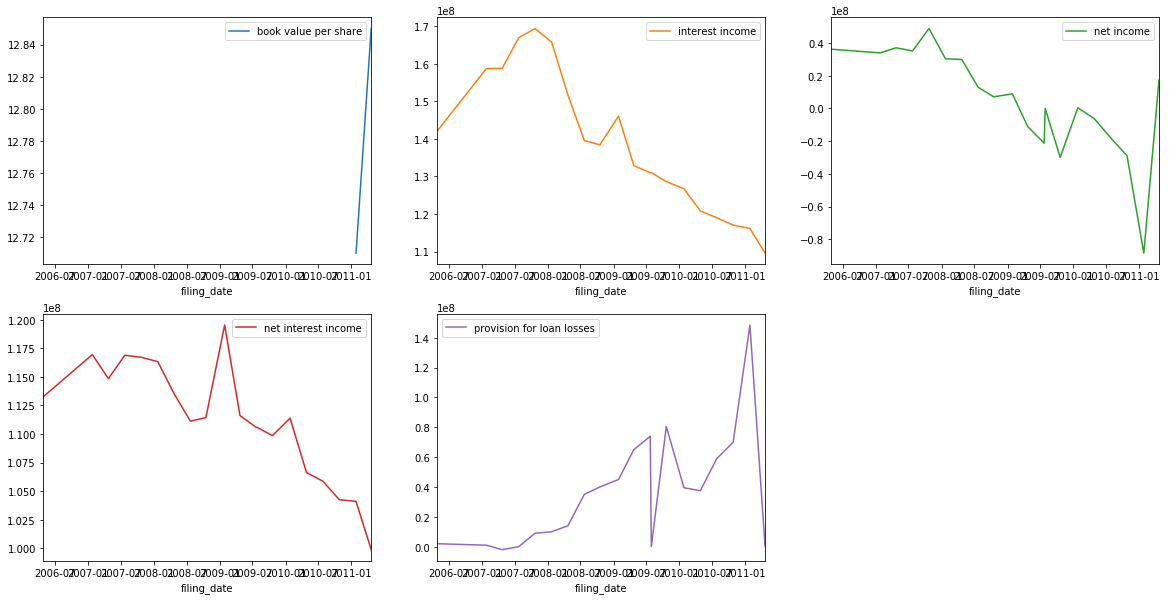

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000106926 book value per share       2006Q1 to 2010Q3: 19 periods    missing   
           interest income             2006Q2 to 2006Q3: 2 periods    missing   
           net income                  2006Q2 to 2006Q3: 2 periods    missing   
           net income                                       2009Q2  duplicate   
           net interest income         2006Q2 to 2006Q3: 2 periods    missing   
           provision for loan losses   2006Q2 to 2006Q3: 2 periods    missing   
           provision for loan losses                        2009Q2  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000106926 book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()